In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic') 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
df.shape

(891, 15)

In [7]:
df.dropna().shape

(182, 15)

In [9]:
df.dropna(axis=1)


,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


<Axes: xlabel='age', ylabel='Count'>

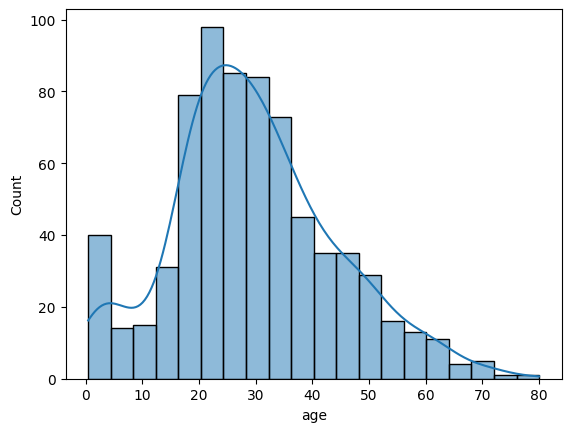

In [15]:
sns.histplot(df['age'],kde=True)

<Axes: xlabel='age_mean', ylabel='Count'>

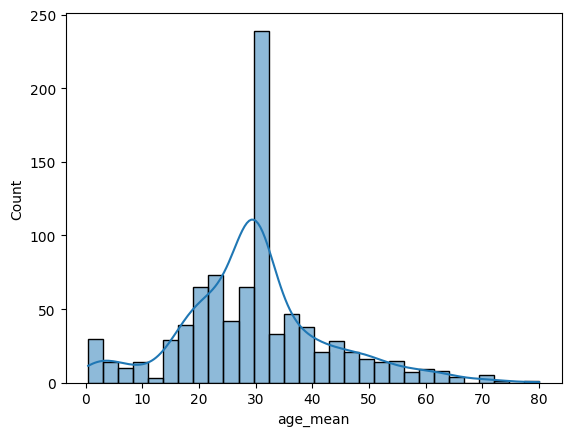

In [18]:
df['age_mean'] = df['age'].fillna(df['age'].mean())
sns.histplot(df['age_mean'],kde=True)

<Axes: xlabel='Age_median', ylabel='Count'>

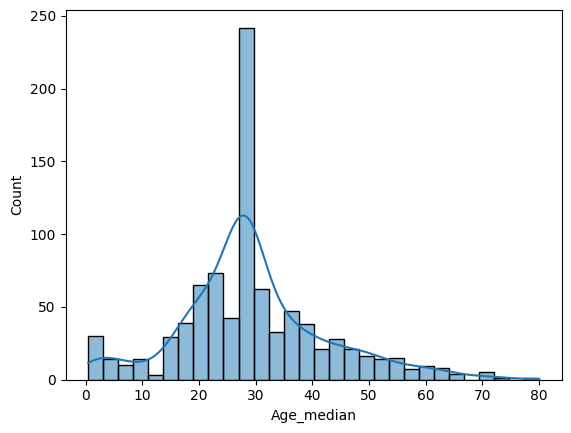

In [21]:
df['Age_median'] = df['age'].fillna(df['age'].median())
sns.histplot(df['Age_median'],kde=True)

In [29]:
#mode imputation
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [30]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [35]:
mode_val = df['embarked'].mode()[0]
mode_val

'S'

np.int64(0)

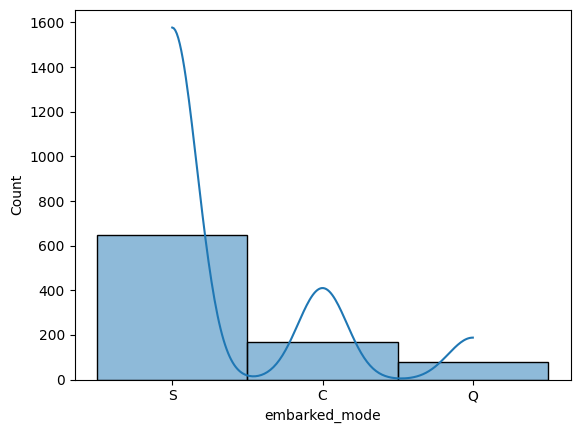

In [37]:
df['embarked_mode'] = df['embarked'].fillna(mode_val)
sns.histplot(df['embarked_mode'],kde=True)
df['embarked_mode'].isnull().sum()

In [38]:
def random_sample_imputation(series):
    missing = series.isnull()
    n_missing = missing.sum()
    sampled_values = series.dropna().sample(n_missing, replace=True, random_state=42)
    sampled_values.index = series[missing].index  # align indices
    series[missing] = sampled_values
    return series

df['age_random'] = random_sample_imputation(df['age'])


C:\Users\HP\AppData\Local\Temp\ipykernel_5652\3396974108.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[missing] = sampled_values
